In [1]:
import gdown
file_id = "1LhtXa1fYVp0ta7y3GWJCEAYvFTkqrO_p"
url = f"https://drive.google.com/uc?id={file_id}"

output = "/content/racial_data.csv"

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1LhtXa1fYVp0ta7y3GWJCEAYvFTkqrO_p
To: /content/racial_data.csv
100%|██████████| 8.31M/8.31M [00:00<00:00, 50.4MB/s]


'/content/racial_data.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv('racial_data.csv')

In [4]:
data_frame.head()

,Named_entity,Frequency,Type
0,christian,287986,NORP
1,america,266318,GPE
2,texas,223063,GPE
3,republicans,218912,NORP
4,white house,216936,ORG


In [5]:
data_frame.isna().sum()

Named_entity    8
Frequency       0
Type            0
dtype: int64

In [6]:
data_frame = data_frame.dropna()

In [7]:
data_frame.isna().sum()

Named_entity    0
Frequency       0
Type            0
dtype: int64

In [8]:
data_frame.duplicated().sum()

0

<Axes: ylabel='Count'>

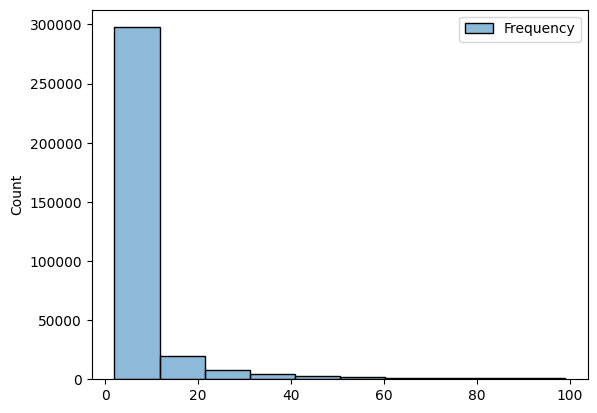

In [9]:
tmp_df = data_frame[data_frame['Frequency']<100]
sns.histplot(tmp_df,bins=10, kde=False, color='blue')

<Axes: xlabel='Frequency', ylabel='Type'>

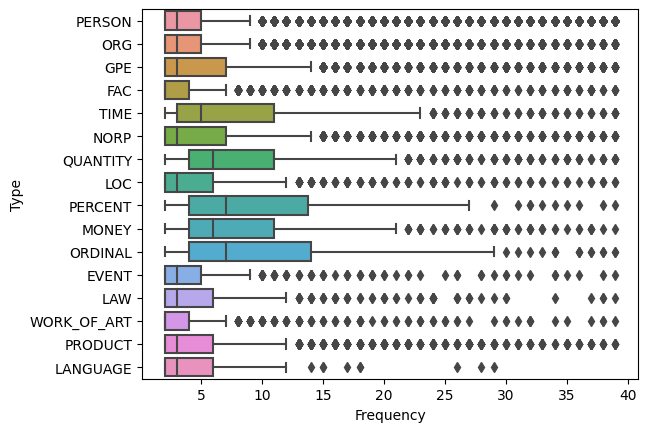

In [14]:
sns.boxplot(tmp_df[tmp_df['Frequency']<40],x='Frequency',y='Type')

In [16]:
tmp_df.head()

,Named_entity,Frequency,Type
9320,padahal orang cuma ngeledekin doang,99,PERSON
9321,hari ini blm ada peletakan batu,99,PERSON
9322,parfois bordeaux lyon paris,99,PERSON
9323,hahaha gorengan mu mas bud,99,PERSON
9324,supporter cayler ellingson,99,PERSON


In [17]:
cut_off1 = data_frame['Frequency'].quantile(0.33)
cut_off2 = data_frame['Frequency'].quantile(0.66)
labels = ["low", "medium", "high"]
data_frame['Frequency_Category'] = pd.cut(data_frame['Frequency'], bins=[0, cut_off1, cut_off2, data_frame['Frequency'].max()], labels=labels, include_lowest=True)

<Axes: xlabel='Frequency_Category', ylabel='count'>

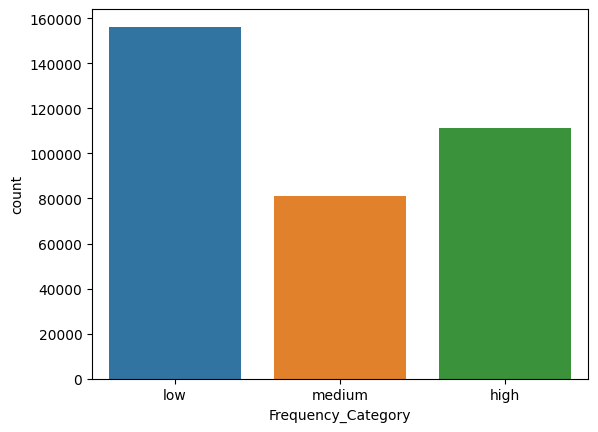

In [18]:
sns.countplot(data=data_frame, x="Frequency_Category")

In [19]:
ordinal_mapping = {'low': 1, 'medium': 2, 'high': 3}
data_frame['Frequency_Category'] = data_frame['Frequency_Category'].map(ordinal_mapping)

In [20]:
data_frame.head()

,Named_entity,Frequency,Type,Frequency_Category
0,christian,287986,NORP,3
1,america,266318,GPE,3
2,texas,223063,GPE,3
3,republicans,218912,NORP,3
4,white house,216936,ORG,3


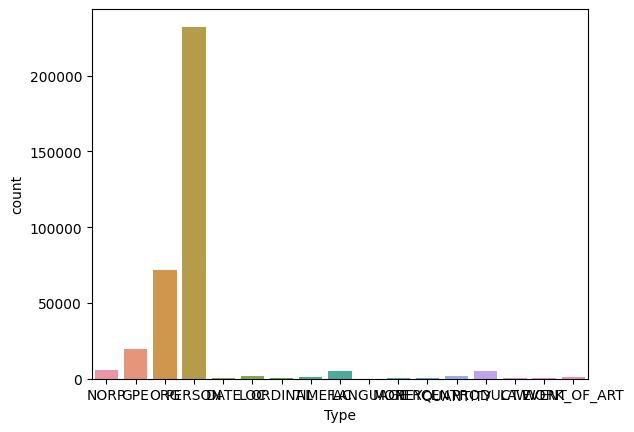

In [15]:
sns.countplot(data=data_frame, x="Type")
plt.show()

In [9]:
data_frame['Type'].value_counts()

PERSON         232329
ORG             71819
GPE             19532
NORP             5564
FAC              5258
PRODUCT          4771
QUANTITY         1964
LOC              1722
TIME             1408
WORK_OF_ART      1203
MONEY             779
ORDINAL           621
LAW               567
EVENT             562
DATE              223
PERCENT           190
LANGUAGE          115
Name: Type, dtype: int64

In [10]:
data_frame.groupby('Type')['Frequency'].mean()

Type
DATE           5341.394619
EVENT            29.996441
FAC              21.732218
GPE             141.241757
LANGUAGE        163.869565
LAW              37.818342
LOC              78.373403
MONEY            89.618742
NORP            585.586988
ORDINAL         239.650564
ORG              42.093680
PERCENT          80.005263
PERSON           22.002940
PRODUCT          17.640117
QUANTITY         37.379328
TIME            160.139915
WORK_OF_ART      14.505403
Name: Frequency, dtype: float64

In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348627 entries, 0 to 348634
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Named_entity  348627 non-null  object
 1   Frequency     348627 non-null  int64 
 2   Type          348627 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.6+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_frame['Type'] = label_encoder.fit_transform(data_frame['Type'])

In [22]:
data_frame.head()

,Named_entity,Frequency,Type,Frequency_Category
0,christian,287986,8,3
1,america,266318,3,3
2,texas,223063,3,3
3,republicans,218912,8,3
4,white house,216936,10,3


In [24]:
columns_to_keep = ['Named_entity', 'Frequency_Category', 'Type']
output_file = 'output.csv'
data_frame[columns_to_keep].to_csv(output_file, index=False)